# K-MEANS CLUSTERING 

## Experiment 1: Simple Dataset

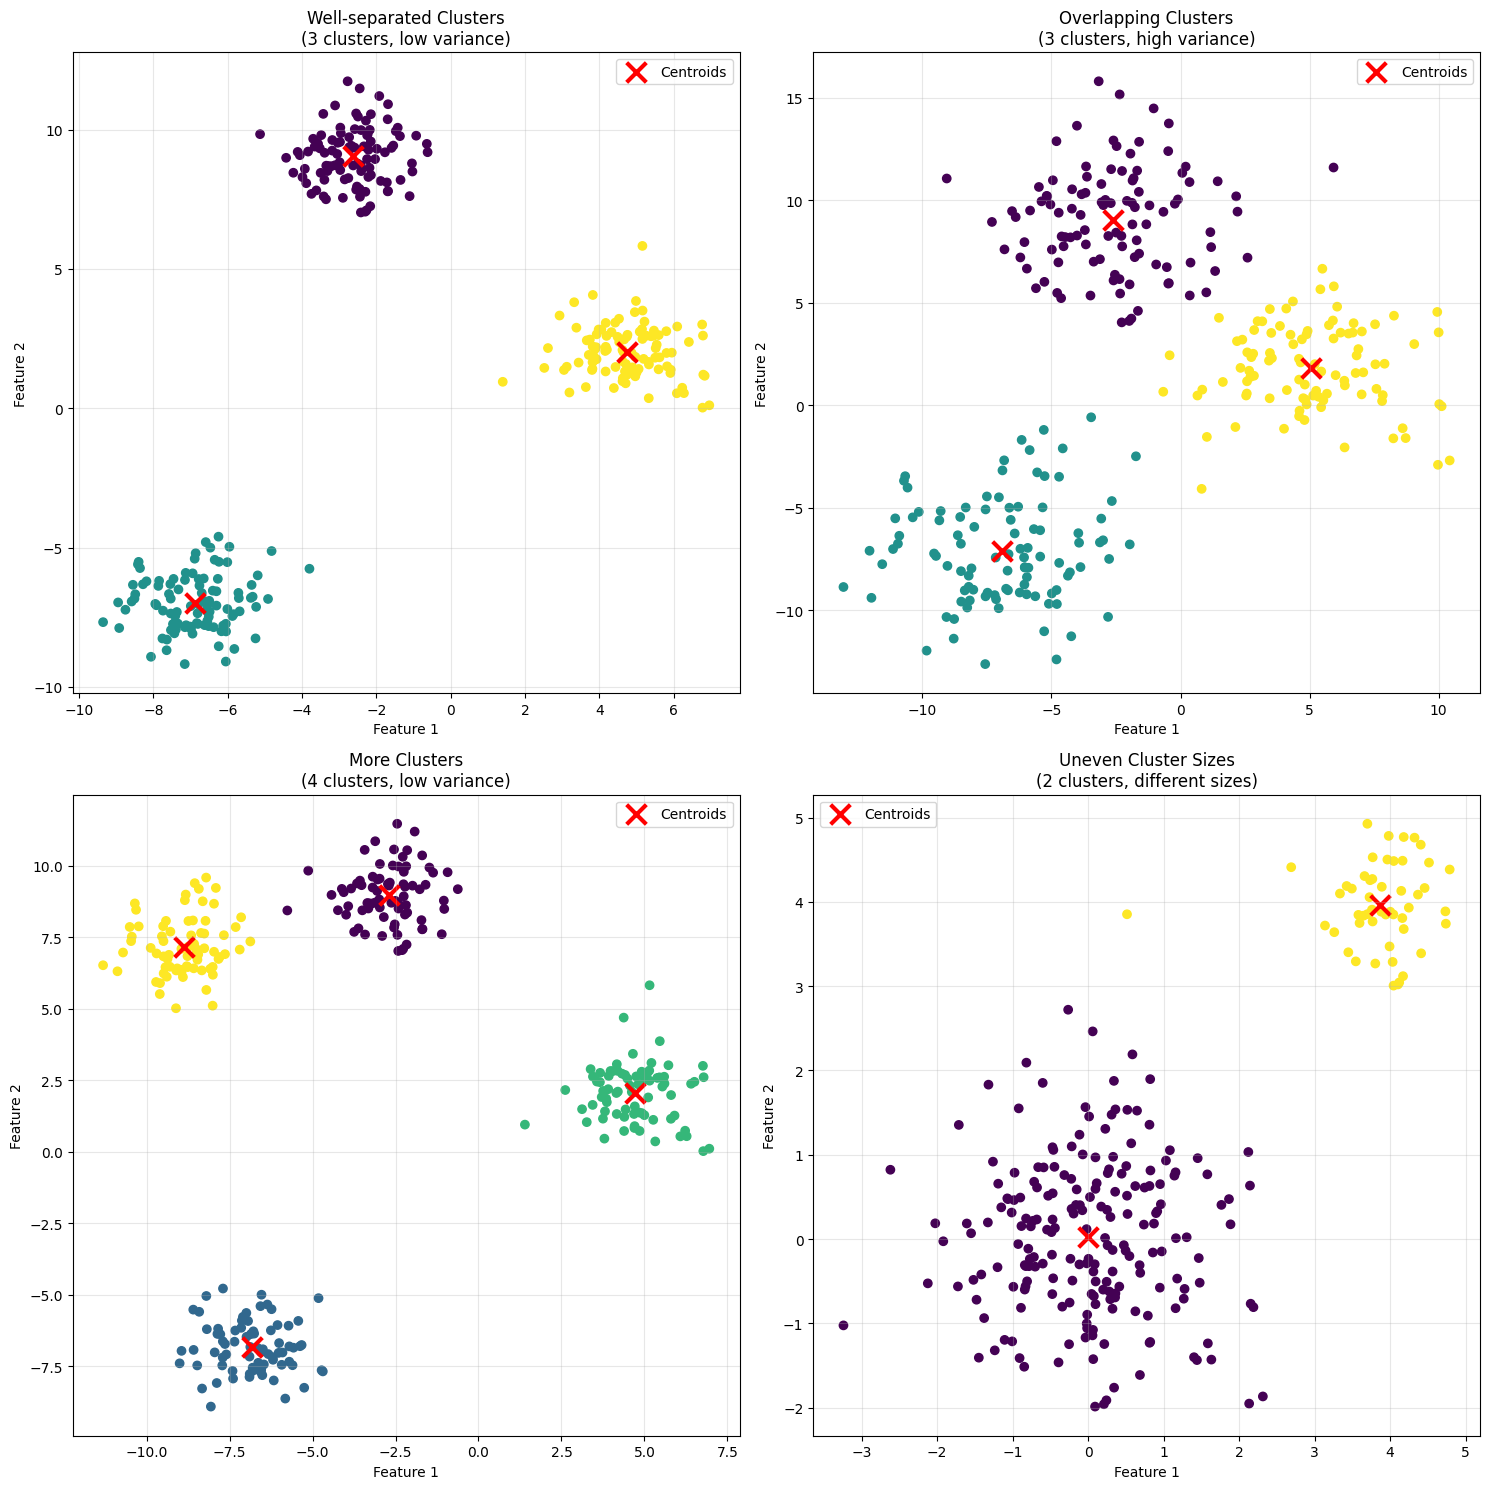

Inertia scores:
Experiment 1 (Well-separated): 566.86
Experiment 2 (Overlapping): 3467.43
Experiment 3 (More clusters): 564.91
Experiment 4 (Uneven sizes): 384.81


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate dataset with different configurations
np.random.seed(42)

# Create figure with multiple experiments
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
axes = axes.ravel()

# Experiment 1: Well-separated clusters
X1, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
kmeans1 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels1 = kmeans1.fit_predict(X1)

axes[0].scatter(X1[:, 0], X1[:, 1], c=labels1, cmap='viridis')
axes[0].scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:, 1], 
                color='red', marker='x', s=200, linewidth=3, label='Centroids')
axes[0].set_title('Well-separated Clusters\n(3 clusters, low variance)')
axes[0].legend()

# Experiment 2: Overlapping clusters
X2, _ = make_blobs(n_samples=300, centers=3, cluster_std=2.5, random_state=42)
kmeans2 = KMeans(n_clusters=3, random_state=42, n_init=10)
labels2 = kmeans2.fit_predict(X2)

axes[1].scatter(X2[:, 0], X2[:, 1], c=labels2, cmap='viridis')
axes[1].scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], 
                color='red', marker='x', s=200, linewidth=3, label='Centroids')
axes[1].set_title('Overlapping Clusters\n(3 clusters, high variance)')
axes[1].legend()

# Experiment 3: Different number of clusters
X3, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)
kmeans3 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels3 = kmeans3.fit_predict(X3)

axes[2].scatter(X3[:, 0], X3[:, 1], c=labels3, cmap='viridis')
axes[2].scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1], 
                color='red', marker='x', s=200, linewidth=3, label='Centroids')
axes[2].set_title('More Clusters\n(4 clusters, low variance)')
axes[2].legend()

# Experiment 4: Uneven clusters
X4_1, _ = make_blobs(n_samples=200, centers=[[0,0]], cluster_std=1.0, random_state=42)
X4_2, _ = make_blobs(n_samples=50, centers=[[4,4]], cluster_std=0.5, random_state=42)
X4 = np.vstack([X4_1, X4_2])
kmeans4 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels4 = kmeans4.fit_predict(X4)

axes[3].scatter(X4[:, 0], X4[:, 1], c=labels4, cmap='viridis')
axes[3].scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:, 1], 
                color='red', marker='x', s=200, linewidth=3, label='Centroids')
axes[3].set_title('Uneven Cluster Sizes\n(2 clusters, different sizes)')
axes[3].legend()

# General settings
for ax in axes:
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Print inertia (within-cluster sum of squares) for each experiment
print("Inertia scores:")
print(f"Experiment 1 (Well-separated): {kmeans1.inertia_:.2f}")
print(f"Experiment 2 (Overlapping): {kmeans2.inertia_:.2f}")
print(f"Experiment 3 (More clusters): {kmeans3.inertia_:.2f}")
print(f"Experiment 4 (Uneven sizes): {kmeans4.inertia_:.2f}")

## Experiment 2: Ambiguous Dataset

C:\Users\39392\AppData\Local\Temp\ipykernel_19428\3528689256.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', max(cluster_range)).colors


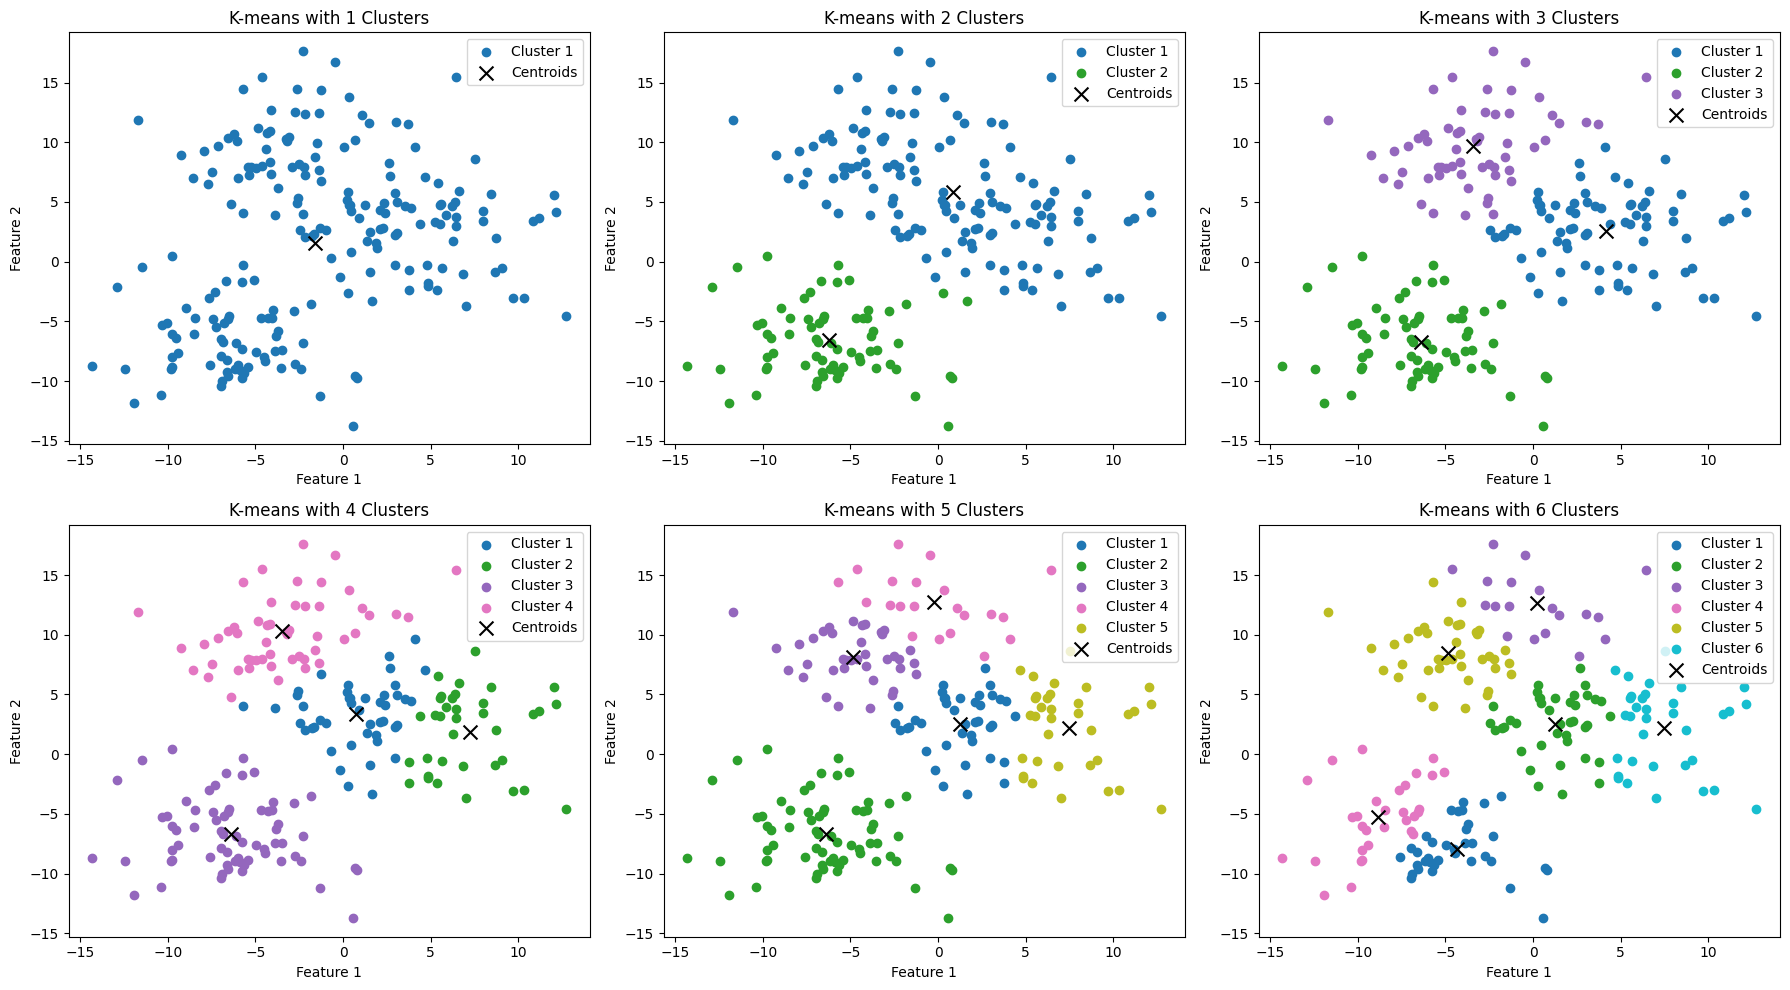


Clustering Evaluation Results:
   Number of Clusters       Inertia  Silhouette Coefficient
0                   1  16882.637054                0.000000
1                   2   7691.036886                0.505735
2                   3   4145.258283                0.512669
3                   4   3409.718524                0.433244
4                   5   2881.278208                0.424719
5                   6   2424.110567                0.352714


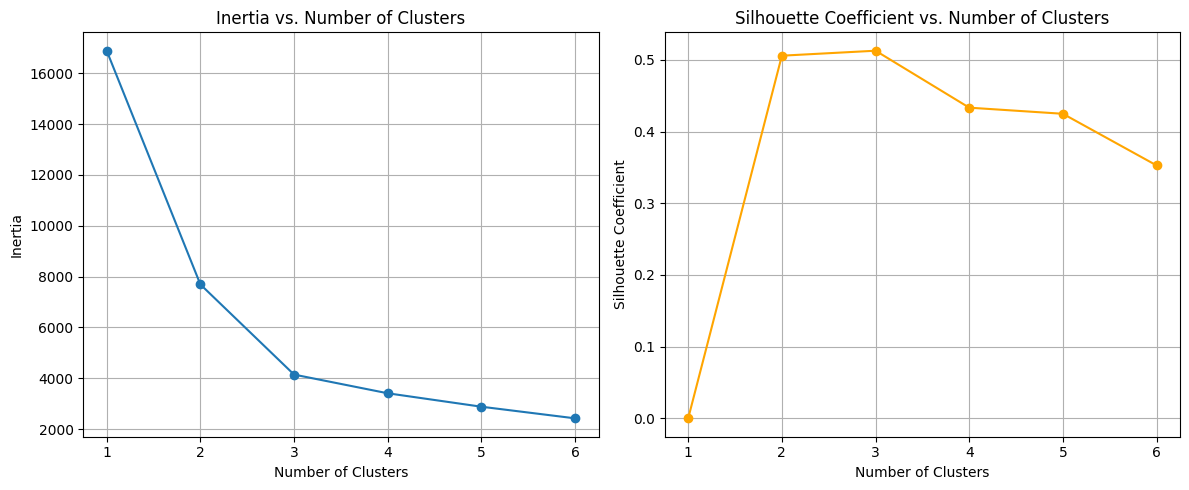

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.cm as cm

def calculate_inertia(data, labels, centers):
    """
    Calculates inertia (sum of squared distances from points to their centroids)
    """
    return np.sum([np.linalg.norm(data[labels == i] - center) ** 2 
                  for i, center in enumerate(centers)])

def calculate_silhouette(data, labels):
    """
    Calculates average silhouette coefficient
    """
    from sklearn.metrics import silhouette_score
    if len(np.unique(labels)) <= 1:
        return 0
    return silhouette_score(data, labels)

# Generate ambiguous dataset
data, _ = make_blobs(n_samples=200, centers=3, cluster_std=3.5, random_state=42)

# Iterate over different numbers of clusters
cluster_range = [1, 2, 3, 4, 5, 6]
results = []
plt.figure(figsize=(18, 10))

# Generate color palette
colors = cm.get_cmap('tab10', max(cluster_range)).colors

for idx, n_clusters in enumerate(cluster_range, 1):
    # Run K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    centers = kmeans.cluster_centers_
    
    # Calculate metrics
    inertia = kmeans.inertia_
    silhouette = calculate_silhouette(data, labels)
    results.append((n_clusters, inertia, silhouette))

    # Visualize results
    plt.subplot(2, 3, idx)
    for j in range(n_clusters):
        cluster_points = data[labels == j]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                   color=colors[j], label=f'Cluster {j+1}')
    plt.scatter(centers[:, 0], centers[:, 1], 
               color='black', marker='x', s=100, label='Centroids')
    plt.title(f"K-means with {n_clusters} Clusters")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

plt.tight_layout()
plt.show()

# Create DataFrame with results
results_df = pd.DataFrame(results, 
                         columns=['Number of Clusters', 'Inertia', 'Silhouette Coefficient'])

# Print results table
print("\nClustering Evaluation Results:")
print(results_df)

# Visualize results
plt.figure(figsize=(12, 5))

# Inertia plot
plt.subplot(1, 2, 1)
plt.plot(results_df['Number of Clusters'], results_df['Inertia'], marker='o')
plt.title('Inertia vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()

# Silhouette coefficient plot
plt.subplot(1, 2, 2)
plt.plot(results_df['Number of Clusters'], results_df['Silhouette Coefficient'], 
         marker='o', color='orange')
plt.title('Silhouette Coefficient vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid()

plt.tight_layout()
plt.show()

# FUZZY C-MEANS CLUSTERING

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

def initialize_membership_matrix(n_samples, n_clusters):
    """
    Initializes a membership matrix with random values that sum to 1 across clusters for each data point.
    """
    membership_matrix = np.random.dirichlet(np.ones(n_clusters), size=n_samples)
    return membership_matrix

def update_cluster_centers(data, membership_matrix, fuzziness):
    """
    Updates cluster centers based on the current membership matrix and fuzziness.
    """
    n_clusters = membership_matrix.shape[1]
    centers = np.zeros((n_clusters, data.shape[1]))
    for j in range(n_clusters):
        num = np.sum((membership_matrix[:, j] ** fuzziness)[:, np.newaxis] * data, axis=0)
        denom = np.sum(membership_matrix[:, j] ** fuzziness)
        centers[j] = num / denom
    return centers

def update_membership_matrix(data, centers, fuzziness):
    """
    Updates the membership matrix based on the current cluster centers.
    """
    n_samples = data.shape[0]
    n_clusters = centers.shape[0]
    new_membership_matrix = np.zeros((n_samples, n_clusters))
    for i in range(n_samples):
        for j in range(n_clusters):
            dist_ratio_sum = sum(
                (np.linalg.norm(data[i] - centers[j]) / np.linalg.norm(data[i] - centers[k])) ** (2 / (fuzziness - 1))
                for k in range(n_clusters)
            )
            new_membership_matrix[i, j] = 1 / dist_ratio_sum
    return new_membership_matrix

def fuzzy_c_means(data, n_clusters=3, fuzziness=2, max_iter=100, epsilon=1e-5):
    """
    Fuzzy C-Means algorithm to cluster the input data.
    
    Parameters:
    - data: ndarray, shape (n_samples, n_features)
    - n_clusters: int, number of clusters
    - fuzziness: float, fuzziness parameter (typically > 1)
    - max_iter: int, maximum number of iterations
    - epsilon: float, convergence threshold
    
    Returns:
    - centers: ndarray, shape (n_clusters, n_features), cluster centers
    - membership_matrix: ndarray, shape (n_samples, n_clusters), final membership matrix
    """
    n_samples = data.shape[0]
    membership_matrix = initialize_membership_matrix(n_samples, n_clusters)
    
    for iteration in range(max_iter):
        centers = update_cluster_centers(data, membership_matrix, fuzziness)
        new_membership_matrix = update_membership_matrix(data, centers, fuzziness)
        
        # Check convergence (in term of differences between new and old membership matrix)
        if np.linalg.norm(new_membership_matrix - membership_matrix) < epsilon:
            print(f"Converged after {iteration} iterations.")
            break
            
        membership_matrix = new_membership_matrix
    
    return centers, membership_matrix

## Experiment 1: Simple Dataset 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Converged after 11 iterations.


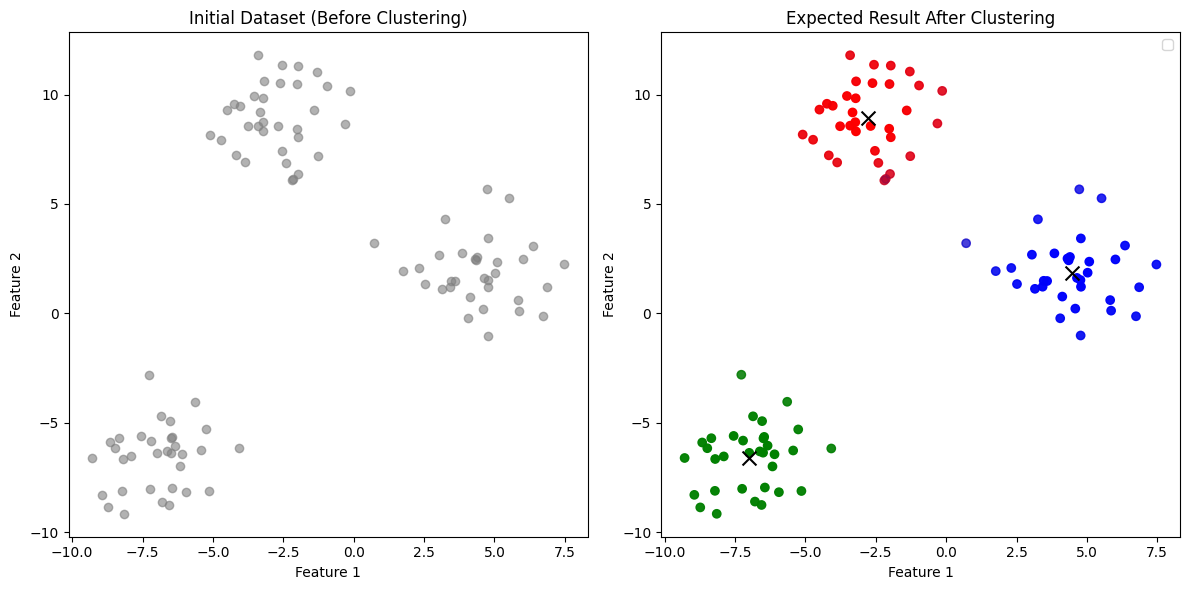

In [2]:
# Generate some sample data for clustering
data, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.5, random_state=42)

# Visualize the initial dataset
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], color='gray', alpha=0.6)
plt.title("Initial Dataset (Before Clustering)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Run Fuzzy C-Means
n_clusters = 3
fuzziness = 2
centers, membership_matrix = fuzzy_c_means(data, n_clusters=n_clusters, fuzziness=fuzziness, max_iter=100, epsilon=1e-5)

# Visualize the clustering results
plt.subplot(1, 2, 2)
colors = ['red', 'blue', 'green']
for j in range(n_clusters):
    plt.scatter(data[:, 0], data[:, 1], alpha=membership_matrix[:, j], color=colors[j])
plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=100)
plt.title("Expected Result After Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.tight_layout()
plt.show()


## Experiment 2: Ambiguous Dataset

C:\Users\39392\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Converged after 25 iterations.


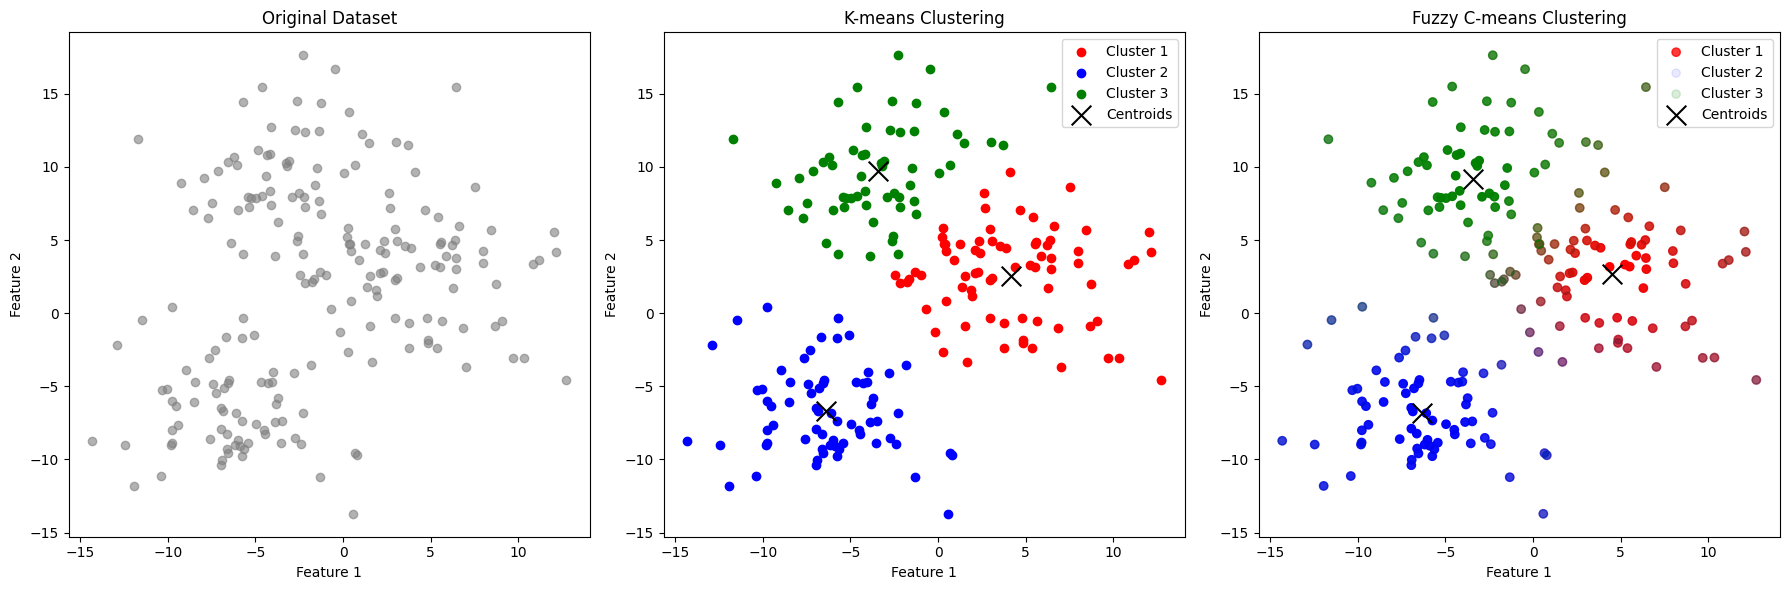

In [5]:
# Generate a more ambiguous dataset
data, _ = make_blobs(n_samples=200, centers=3, cluster_std=3.5, random_state=42)

# Define consistent colors for both methods
colors = ['red', 'blue', 'green']

# Create figure with three subplots
plt.figure(figsize=(18, 6))

# Plot 1: Original Dataset
plt.subplot(1, 3, 1)
plt.scatter(data[:, 0], data[:, 1], color='gray', alpha=0.6)
plt.title("Original Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plot 2: K-means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data)

plt.subplot(1, 3, 2)
for i in range(3):
    mask = kmeans_labels == i
    plt.scatter(data[mask, 0], data[mask, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
           color='black', marker='x', s=200, label='Centroids')
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Plot 3: Fuzzy C-means Clustering
n_clusters = 3
fuzziness = 2
centers, membership_matrix = fuzzy_c_means(data, n_clusters=n_clusters, 
                                         fuzziness=fuzziness, 
                                         max_iter=100, 
                                         epsilon=1e-5)

plt.subplot(1, 3, 3)
for j in range(n_clusters):
    plt.scatter(data[:, 0], data[:, 1], 
               alpha=membership_matrix[:, j], 
               color=colors[j], 
               label=f'Cluster {j+1}')
plt.scatter(centers[:, 0], centers[:, 1], 
           color='black', marker='x', s=200, 
           label='Centroids')
plt.title("Fuzzy C-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.tight_layout()
plt.show()

## Experiment 3: Find The Best Number Of Clusters 

C:\Users\39392\AppData\Local\Temp\ipykernel_17252\4147033495.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', max(cluster_range)).colors  # Use a colormap that supports multiple colors


Converged after 0 iterations.
Converged after 24 iterations.
Converged after 21 iterations.
Converged after 55 iterations.


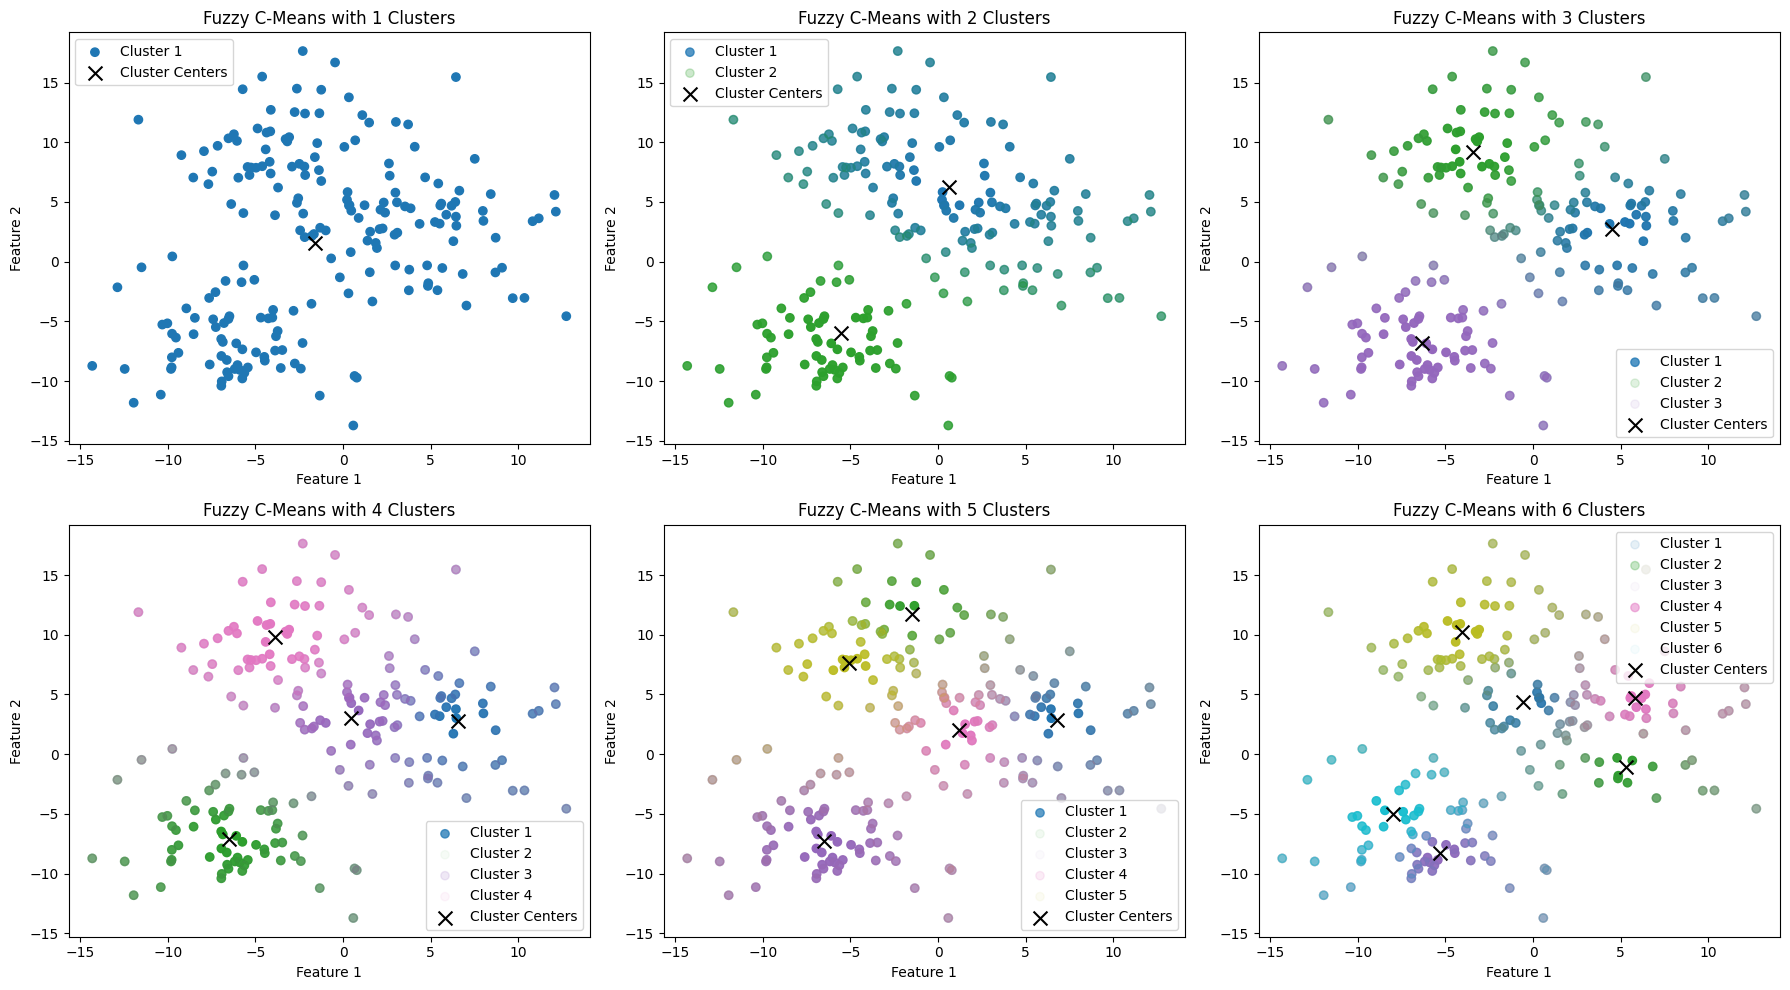


Clustering Evaluation Results:
   Number of Clusters  Partition Coefficient  Partition Entropy
0                   1               1.000000      -9.999997e-11
1                   2               0.786513       3.507681e-01
2                   3               0.726667       5.065351e-01
3                   4               0.639803       6.985021e-01
4                   5               0.585582       8.389264e-01
5                   6               0.544736       9.430700e-01


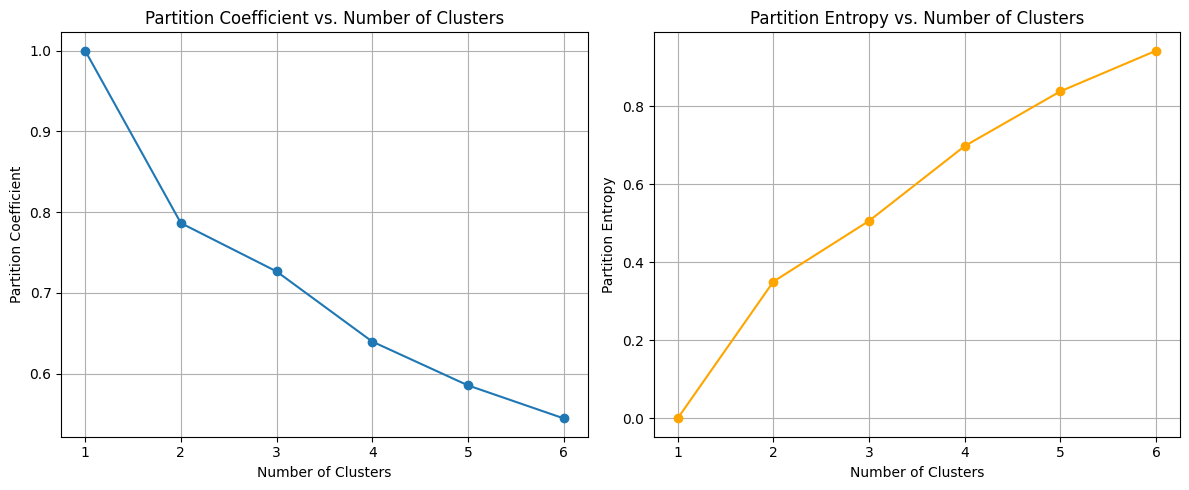

In [13]:
import pandas as pd

def partition_coefficient(membership_matrix):
    pc = np.sum(membership_matrix ** 2) / membership_matrix.shape[0]
    return pc

def partition_entropy(membership_matrix):
    n_samples, n_clusters = membership_matrix.shape
    pe = -np.sum(membership_matrix * np.log(membership_matrix + 1e-10)) / n_samples  # add epsilon to avoid log(0)
    return pe

# Generate a more ambiguous dataset
data, _ = make_blobs(n_samples=200, centers=3, cluster_std=3.5, random_state=42)

# Loop over different numbers of clusters and visualize results
fuzziness = 2
cluster_range = [1, 2, 3, 4, 5, 6]
results = []
plt.figure(figsize=(18, 10))

# Generate a color palette large enough to accommodate more clusters
colors = cm.get_cmap('tab10', max(cluster_range)).colors  # Use a colormap that supports multiple colors

for idx, n_clusters in enumerate(cluster_range, 1):
    centers, membership_matrix = fuzzy_c_means(data, n_clusters=n_clusters, fuzziness=fuzziness, max_iter=100, epsilon=1e-5)
    
    # compute scores 
    pc = partition_coefficient(membership_matrix)
    pe = partition_entropy(membership_matrix)
    results.append((n_clusters, pc, pe))

    # Plot results for the current number of clusters
    plt.subplot(2, 3, idx)
    for j in range(n_clusters):
        plt.scatter(data[:, 0], data[:, 1], alpha=membership_matrix[:, j], color=colors[j], label=f'Cluster {j+1}')
    plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=100, label='Cluster Centers')
    plt.title(f"Fuzzy C-Means with {n_clusters} Clusters")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

plt.tight_layout()
plt.show()

# Create a DataFrame to visualize results
results_df = pd.DataFrame(results, columns=['Number of Clusters', 'Partition Coefficient', 'Partition Entropy'])

# Print the results table
print("\nClustering Evaluation Results:")
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 5))

# Plot Partition Coefficient
plt.subplot(1, 2, 1)
plt.plot(results_df['Number of Clusters'], results_df['Partition Coefficient'], marker='o')
plt.title('Partition Coefficient vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Partition Coefficient')
plt.grid()

# Plot Partition Entropy
plt.subplot(1, 2, 2)
plt.plot(results_df['Number of Clusters'], results_df['Partition Entropy'], marker='o', color='orange')
plt.title('Partition Entropy vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Partition Entropy')
plt.grid()

plt.tight_layout()
plt.show()

## Experiment 4: Fuzziness Coefficient 

Converged after 0 iterations.
Converged after 0 iterations.
Converged after 0 iterations.


C:\Users\39392\AppData\Local\Temp\ipykernel_17252\2463707197.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', n_clusters)  # Get a color map for clusters


Converged after 36 iterations.
Converged after 40 iterations.
Converged after 43 iterations.
Converged after 14 iterations.
Converged after 16 iterations.
Converged after 33 iterations.
Converged after 39 iterations.
Converged after 42 iterations.
Converged after 48 iterations.
Converged after 87 iterations.
Converged after 92 iterations.
Converged after 79 iterations.
Converged after 90 iterations.


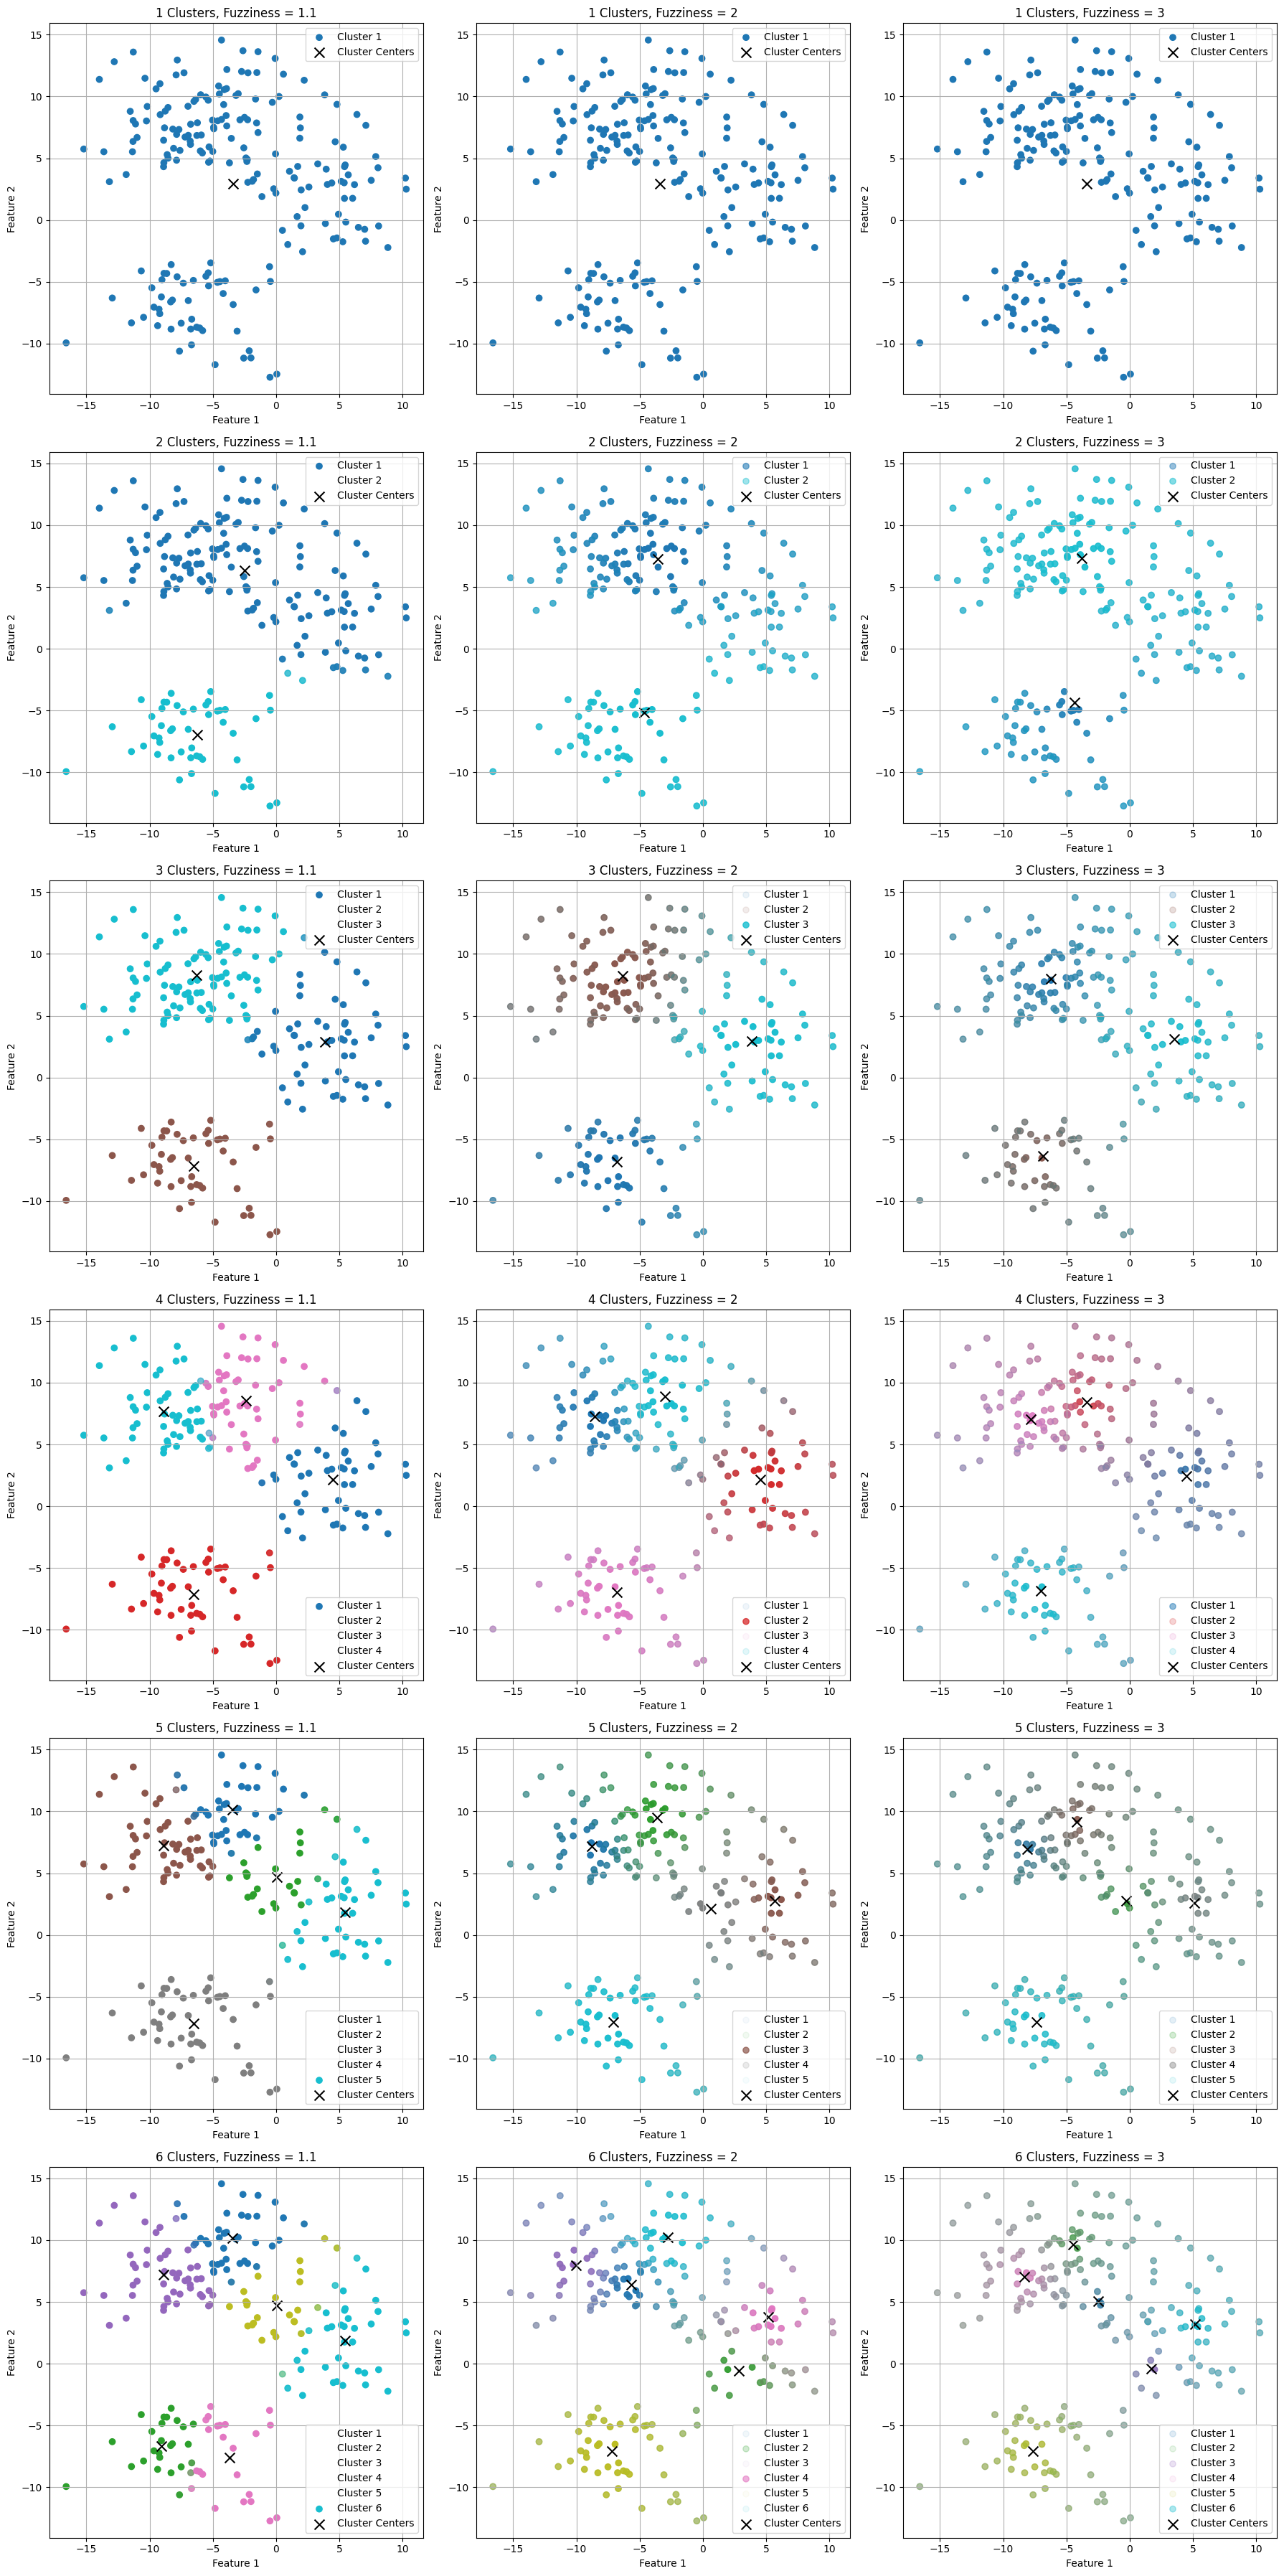

In [18]:
# Generate an ambiguous dataset
data, _ = make_blobs(n_samples=200, centers=4, cluster_std=3.0, random_state=42)

# Define cluster and fuzziness ranges
cluster_range = [1, 2, 3, 4, 5, 6]
fuzziness_range = [1.1, 2, 3]

# Create a figure to visualize the centroids
plt.figure(figsize=(18, 36))

# Run experiments
for i, n_clusters in enumerate(cluster_range, 1):
    for j, fuzziness in enumerate(fuzziness_range, 1):
        # Run Fuzzy C-Means
        centers, membership_matrix = fuzzy_c_means(data, n_clusters=n_clusters, fuzziness=fuzziness, max_iter=100, epsilon=1e-5)
        
        # Plot results for each combination
        plt.subplot(len(cluster_range), len(fuzziness_range), (i - 1) * len(fuzziness_range) + j)
        colors = cm.get_cmap('tab10', n_clusters)  # Get a color map for clusters
        for k in range(n_clusters):
            if k < membership_matrix.shape[1]:  # Ensure we don't exceed the membership matrix bounds
                plt.scatter(data[:, 0], data[:, 1], alpha=membership_matrix[:, k], color=colors(k), label=f'Cluster {k + 1}')
        plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', s=100, label='Cluster Centers')
        plt.title(f"{n_clusters} Clusters, Fuzziness = {fuzziness}")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.legend()
        plt.grid()

plt.tight_layout()
plt.show()


## Experiment 5: Metric Comparison


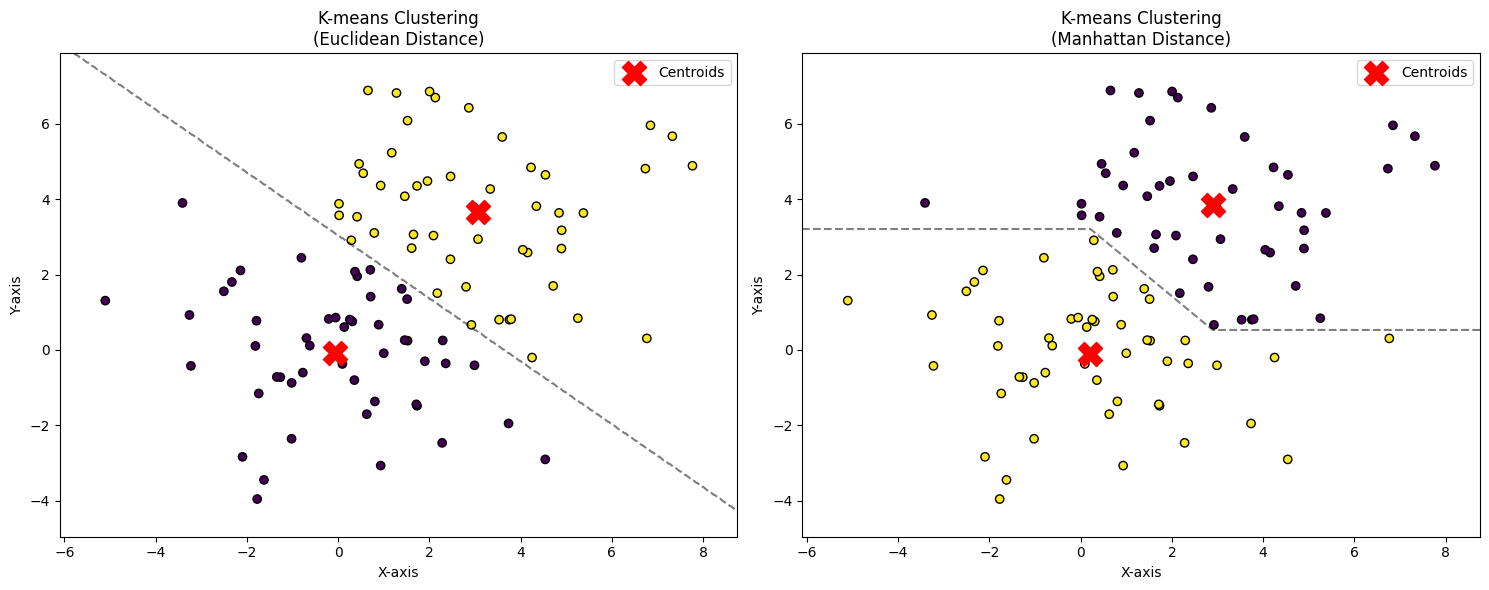

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.spatial.distance import cdist

# Generate the dataset with two clusters
np.random.seed(0)
cluster_1 = np.random.normal(0, 2, (50, 2))  
cluster_2 = np.random.normal(3, 2, (50, 2))
data = np.vstack([cluster_1, cluster_2])

# KMeans from scikit-learn only supports Euclidean distance, so we manually calculate Manhattan distances
def manhattan_kmeans(data, k):
    initial_centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    centroids = initial_centroids.copy()
    
    for _ in range(100):  # 100 iterations max
        distances = cdist(data, centroids, metric='cityblock')
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

def plot_clusters_with_boundary(data, labels, centroids, title, ax, metric='euclidean'):
    # Plot points and centroids
    scatter = ax.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
    ax.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroids')
    
    # Create a mesh grid to plot decision boundary
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))
    
    # Calculate distances and classify each point in the mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    if metric == 'euclidean':
        distances = cdist(mesh_points, centroids)
    else:  # manhattan
        distances = cdist(mesh_points, centroids, metric='cityblock')
    
    Z = np.argmin(distances, axis=1)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    ax.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles='--')
    
    ax.set_title(title)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.legend()

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Compute and plot Euclidean clustering
kmeans_euclidean = KMeans(n_clusters=2, random_state=0, n_init=10)
labels_euclidean = kmeans_euclidean.fit_predict(data)
centroids_euclidean = kmeans_euclidean.cluster_centers_
plot_clusters_with_boundary(data, labels_euclidean, centroids_euclidean, 
                          "K-means Clustering\n(Euclidean Distance)", ax1, 'euclidean')

# Compute and plot Manhattan clustering
labels_manhattan, centroids_manhattan = manhattan_kmeans(data, k=2)
plot_clusters_with_boundary(data, labels_manhattan, centroids_manhattan, 
                          "K-means Clustering\n(Manhattan Distance)", ax2, 'manhattan')

plt.tight_layout()
plt.show()

## Experiment 6: Ingredients


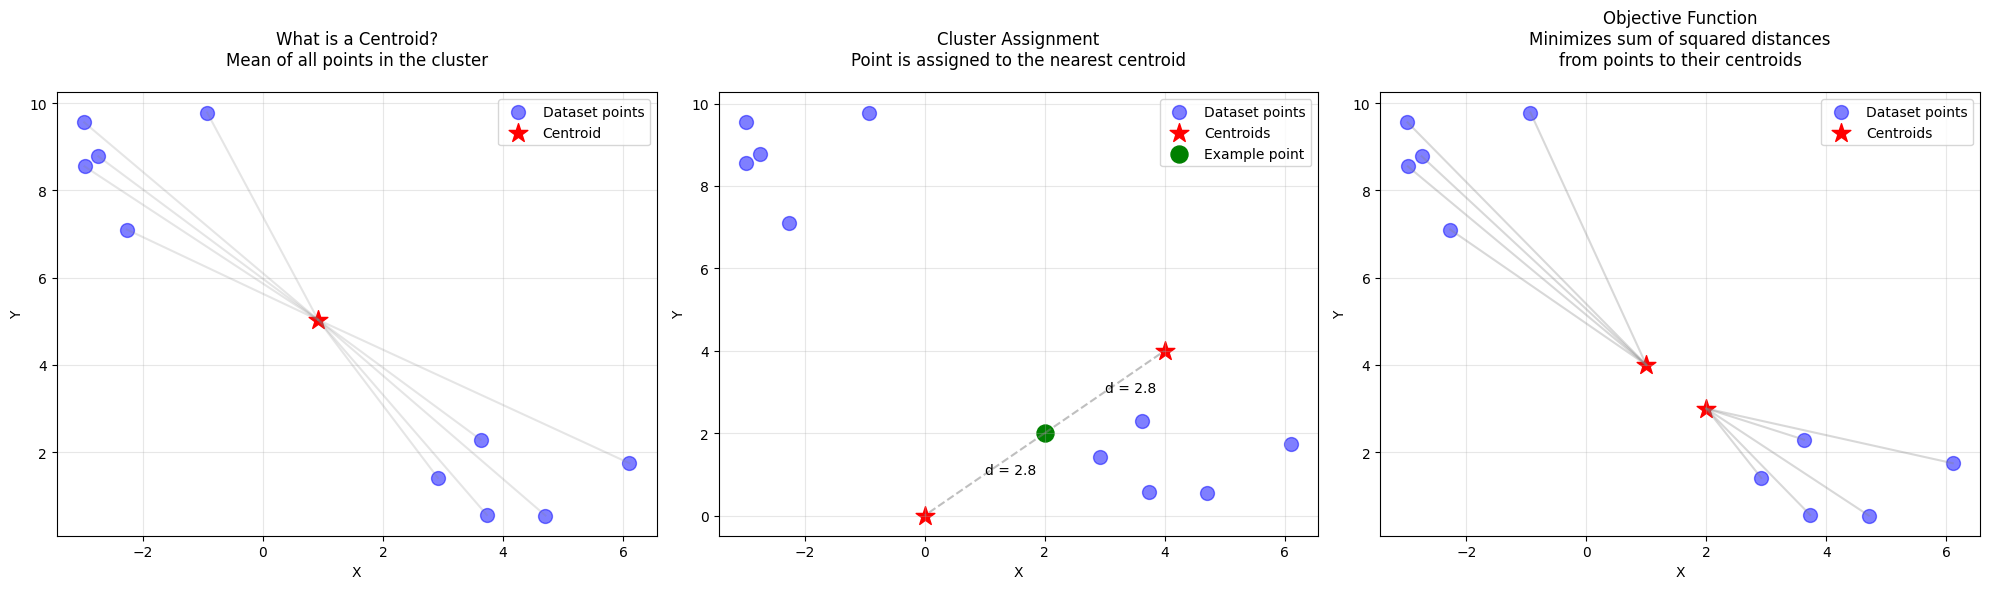

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate a simple dataset with 2 clusters
np.random.seed(42)
X, _ = make_blobs(n_samples=10, centers=2, cluster_std=1.0)

# Manually select a specific point for demonstration
example_point = np.array([2, 2])

# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# 1. Demonstrate what a centroid is
ax1.scatter(X[:, 0], X[:, 1], c='blue', s=100, alpha=0.5, label='Dataset points')
centroid = X.mean(axis=0)
ax1.scatter(centroid[0], centroid[1], c='red', s=200, marker='*', label='Centroid')
ax1.set_title('What is a Centroid?\nMean of all points in the cluster', pad=20)
# Draw lines from centroid to each point
for point in X:
    ax1.plot([centroid[0], point[0]], [centroid[1], point[1]], 'gray', alpha=0.2)
ax1.legend()

# 2. Visualize point assignment to clusters
centroids = np.array([[0, 0], [4, 4]])  # Fixed centroids for example
ax2.scatter(X[:, 0], X[:, 1], c='blue', s=100, alpha=0.5, label='Dataset points')
ax2.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='*', label='Centroids')
ax2.scatter(example_point[0], example_point[1], c='green', s=150, label='Example point')

# Draw lines from example point to centroids
for centroid in centroids:
    dist = np.linalg.norm(example_point - centroid)
    ax2.plot([example_point[0], centroid[0]], [example_point[1], centroid[1]], 
             'gray', alpha=0.5, linestyle='--')
    # Add distance as text
    mid_point = (example_point + centroid) / 2
    ax2.annotate(f'd = {dist:.1f}', (mid_point[0], mid_point[1]))

ax2.set_title('Cluster Assignment\nPoint is assigned to the nearest centroid', pad=20)
ax2.legend()

# 3. Visualize the objective function
ax3.scatter(X[:, 0], X[:, 1], c='blue', s=100, alpha=0.5, label='Dataset points')
poorly_placed_centroids = np.array([[1, 4], [2, 3]])
ax3.scatter(poorly_placed_centroids[:, 0], poorly_placed_centroids[:, 1], 
           c='red', s=200, marker='*', label='Centroids')

# Draw lines from each point to its nearest centroid
for point in X:
    distances = np.linalg.norm(point - poorly_placed_centroids, axis=1)
    nearest_centroid = poorly_placed_centroids[np.argmin(distances)]
    ax3.plot([point[0], nearest_centroid[0]], 
             [point[1], nearest_centroid[1]], 
             'gray', alpha=0.3)

ax3.set_title('Objective Function\nMinimizes sum of squared distances\nfrom points to their centroids', pad=20)
ax3.legend()

# General settings
for ax in [ax1, ax2, ax3]:
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.tight_layout()
plt.show()